# CNN on [CIFAR-10](https://www.cs.toronto.edu/~kriz/cifar.html)

Description of the [site](https://www.cs.toronto.edu/~kriz/cifar.html):

"The CIFAR-10 dataset consists of 60000 32x32 colour images in 10 classes, with 6000 images per class. There are 50000 training images and 10000 test images.

The dataset is divided into five training batches and one test batch, each with 10000 images. The test batch contains exactly 1000 randomly-selected images from each class. The training batches contain the remaining images in random order, but some training batches may contain more images from one class than another. Between them, the training batches contain exactly 5000 images from each class."

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
from keras.datasets import cifar10

(X_train, y_train), (X_test, y_test) = cifar10.load_data();

170498071/170498071 [==============================] - 6s 0us/step


In [3]:
X_train.shape

(50000, 32, 32, 3)

In [43]:
desc_code = {
  0: "airplane",
  1: "automobile",
  2: "bird",
  3: "cat",
  4: "deer",
  5: "dog",
  6: "frog",
  7: "horse",
  8: "ship",
  9: "truck"
}

def show_image(idx: int, X_array=X_train, y_array=y_train):
  plt.title(desc_code[y_array[idx][0]])
  plt.imshow(X_array[idx])
  plt.axis("off")
  plt.show()

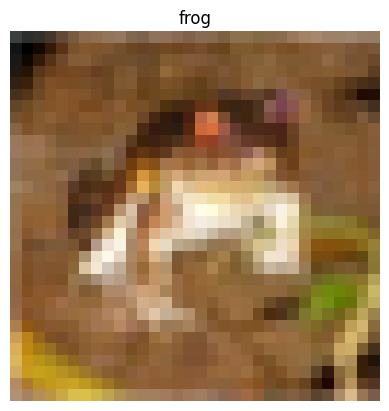

In [44]:
show_image(0)

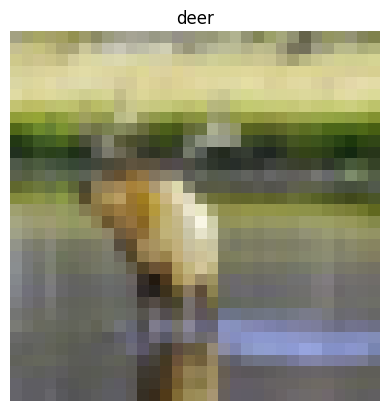

In [45]:
show_image(89)

In [7]:
X_train[0].min(), X_train[0].max()

(0, 255)

In [8]:
X_train = X_train/255
X_test = X_test/255

In [9]:
y_test

array([[3],
       [8],
       [8],
       ...,
       [5],
       [1],
       [7]], dtype=uint8)

In [10]:
from keras.utils import to_categorical

y_cat_train = to_categorical(y_train, num_classes=10)
y_cat_test = to_categorical(y_test, num_classes=10)

y_cat_train

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 1.],
       [0., 0., 0., ..., 0., 0., 1.],
       ...,
       [0., 0., 0., ..., 0., 0., 1.],
       [0., 1., 0., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.]], dtype=float32)

In [29]:
from keras.models import Sequential
from keras.layers import Dense, Conv2D, MaxPool2D, Flatten

model = Sequential()
# Convolutional Layer
model.add(Conv2D(filters=32, kernel_size=(4, 4),
                 input_shape=(32, 32, 3), activation="relu"))
# Pooling Layer
model.add(MaxPool2D(pool_size=(2, 2)))
# Convolutional Layer
model.add(Conv2D(filters=32, kernel_size=(4, 4),
                 input_shape=(32, 32, 3), activation="relu"))
# Pooling Layer
model.add(MaxPool2D(pool_size=(2, 2)))

model.add(Flatten())
model.add(Dense(256, activation="relu"))
model.add(Dense(10, activation="softmax"))
model.compile(loss="categorical_crossentropy", optimizer="adam",
              metrics=["accuracy"])

In [30]:
model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_3 (Conv2D)           (None, 29, 29, 32)        1568      
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 14, 14, 32)       0         
 2D)                                                             
                                                                 
 conv2d_4 (Conv2D)           (None, 11, 11, 32)        16416     
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 5, 5, 32)         0         
 2D)                                                             
                                                                 
 flatten_1 (Flatten)         (None, 800)               0         
                                                                 
 dense_2 (Dense)             (None, 256)              

In [31]:
from keras.callbacks import EarlyStopping

early_stop = EarlyStopping(monitor="val_loss", patience=2)

In [32]:
model.fit(x=X_train, y=y_cat_train, epochs=5,
          validation_data=(X_test, y_cat_test),
          callbacks=[early_stop])

Epoch 1/5
1563/1563 [==============================] - 86s 54ms/step - loss: 1.5291 - accuracy: 0.4480 - val_loss: 1.3272 - val_accuracy: 0.5227
Epoch 2/5
1563/1563 [==============================] - 93s 60ms/step - loss: 1.2211 - accuracy: 0.5674 - val_loss: 1.1770 - val_accuracy: 0.5838
Epoch 3/5
1563/1563 [==============================] - 75s 48ms/step - loss: 1.0808 - accuracy: 0.6185 - val_loss: 1.0996 - val_accuracy: 0.6140
Epoch 4/5
1563/1563 [==============================] - 114s 73ms/step - loss: 0.9694 - accuracy: 0.6615 - val_loss: 1.0372 - val_accuracy: 0.6439
Epoch 5/5
1563/1563 [==============================] - 102s 65ms/step - loss: 0.8754 - accuracy: 0.6932 - val_loss: 0.9699 - val_accuracy: 0.6624


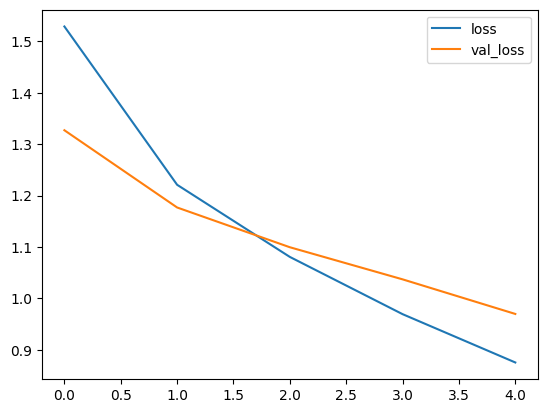

In [33]:
df_loss = pd.DataFrame(model.history.history)
df_loss[["loss", "val_loss"]].plot()
plt.show()

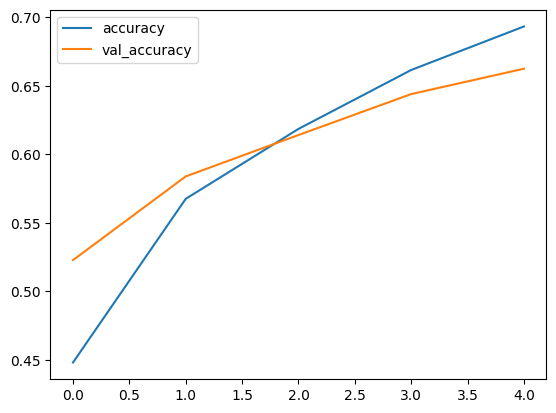

In [34]:
df_loss[["accuracy", "val_accuracy"]].plot()
plt.show()

In [35]:
model.evaluate(X_test, y_cat_test, verbose=0)

[0.9698635935783386, 0.6624000072479248]

In [36]:
from sklearn.metrics import classification_report, confusion_matrix

predictions = np.argmax(model.predict(X_test), axis=1)
print(classification_report(y_test, predictions))

313/313 [==============================] - 4s 13ms/step
              precision    recall  f1-score   support

           0       0.68      0.74      0.71      1000
           1       0.78      0.80      0.79      1000
           2       0.59      0.53      0.56      1000
           3       0.46      0.52      0.49      1000
           4       0.60      0.60      0.60      1000
           5       0.58      0.50      0.54      1000
           6       0.72      0.76      0.74      1000
           7       0.74      0.69      0.72      1000
           8       0.81      0.69      0.75      1000
           9       0.68      0.79      0.73      1000

    accuracy                           0.66     10000
   macro avg       0.66      0.66      0.66     10000
weighted avg       0.66      0.66      0.66     10000



In [37]:
print(confusion_matrix(y_test, predictions))

[[742  29  40  16  26   9  12   5  56  65]
 [ 23 802   8  16   9   9   8   6  15 104]
 [ 79   9 530  83 103  67  76  23  13  17]
 [ 22  12  75 521  71 146  65  47  12  29]
 [ 25   5  74  78 599  39  76  72  21  11]
 [ 23   3  70 232  51 500  28  66   8  19]
 [  9  14  43  83  44  19 756  12   6  14]
 [ 26   3  33  59  72  62   8 695   4  38]
 [121  50  11  22  16  12   5   3 687  73]
 [ 20 101  14  16  10   6  10  10  21 792]]


In [38]:
labels = [desc_code[i] for i in range(10)]
labels

['airplane',
 'automobile',
 'bird',
 'cat',
 'deer',
 'dog',
 'frog',
 'horse',
 'ship',
 'truck']

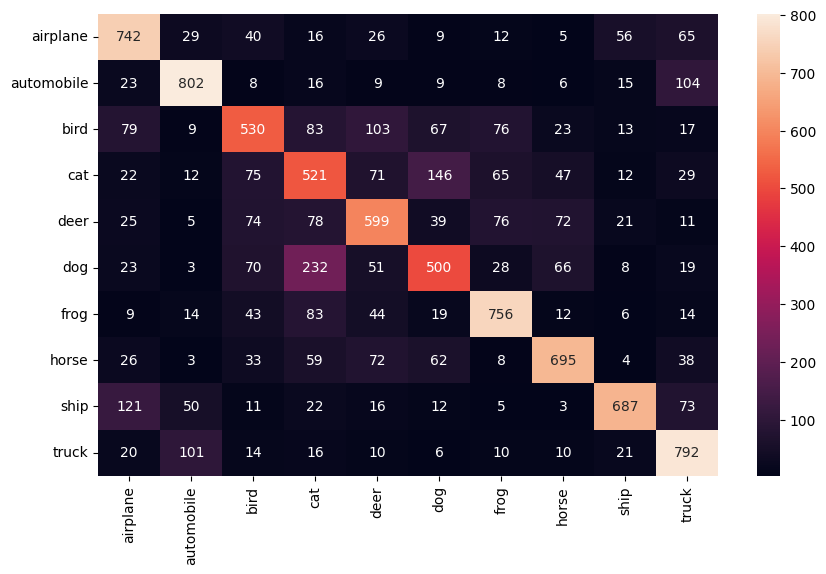

In [40]:
import seaborn as sns

plt.figure(figsize=(10, 6))
# https://stackoverflow.com/questions/69448270/change-axis-labels-for-seaborn-heatmap
df_confusion_matrix = pd.DataFrame(confusion_matrix(y_test, predictions), index=labels, columns=labels)
sns.heatmap(df_confusion_matrix, annot=True, fmt="g")
plt.show()

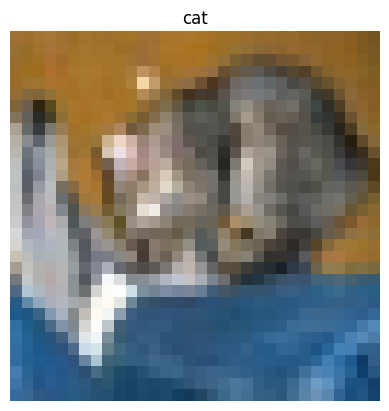

In [53]:
my_image = X_test[0]
show_image(0, X_test, y_test)

In [54]:
desc_code[np.argmax(model.predict(my_image.reshape(1, 32, 32, 3)))]

1/1 [==============================] - 0s 71ms/step


'cat'

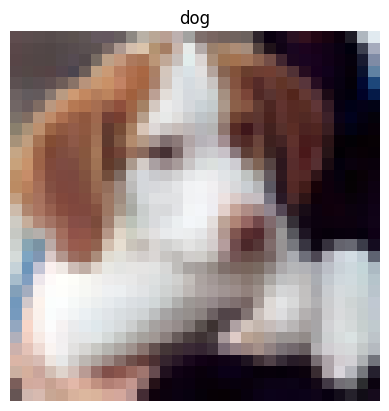

In [55]:
my_image = X_test[16]
show_image(16, X_test, y_test)

In [56]:
desc_code[np.argmax(model.predict(my_image.reshape(1, 32, 32, 3)))]

1/1 [==============================] - 0s 24ms/step


'dog'